In [1]:
# First, what do we even mean by concentration?
# when assessing the concentration of a certain data, we want to know where the data is mostly occuring
# lets analyse this by using a bank analogy
# you might want to know whether your transactions are concentrated on a few unique bank transactions ie groceries or maybe, you equaly use your money appropriately by feeding all your needs equaly
# measures of concentration allow you to know how evenly distributed a certain variable is 
# one strategy that is commonly used to visualize the concentration of data variables involves the use of the Lorenz curve

In [2]:
#                                     THE LORENZ CURVE 
# so, again, what is the lorenz curve
# lets think of it this way, assuming that you are in a school and you want to acess the grades of all the students in a school
# Definetely we have students with high grades, and those with low grades
# Using a lorenz curve, we can analyse how student grades are distributed in the school
# do most student have poor grades? or do most of them have good grades
# with this information, now then, think of this analogy in form of stair cases where students with high grades are on top of the stairts, and students with low grades are in the lower section of the stairts
# thats how a lorenz curve works. However, the hight between one step and the other will not be equal, since grades, and any other values do not have the same increment. one student may have 20%, the next student might have 22%, next student 30% m next student %50, etc. our staircase in this analogy wont  have an equal height
# the bigger the difference between one value and the other, the higher the step in our stair case. 
# the height of our staircase will be equal to the sum of the individual heights that exist in our data. or simply, the heights of the steps.
# if all the values are distributed equaly, the distribution would be equal, and the height incriment would be equal, and hence,the stair case would create something that resemples a 45 degree triangle, where the lorenze curve would be the diagonal.
# if the values are only distributed in one region, the lorenz curve will be further from the first bisector (or the diagonal if we choose to use the analogy above)

In [3]:
# Since the lorenze curve is a curve and not a statistic, if we want to measure the distribution, we have to find the area under the curve
# that's where the Gini index comes to play
# The gini index is a measure of the are between the lorenz Curve and the first bisector 

# if a certain value is said to be concentrated it means that the majority of the values are produced by few individual variables,
# for example, if we say wealth is concentrated, we mean that majority of the wealth (80%) is held by 10% of the population
# in an equal distribution, 10% of the population would have acess to 10% of the total income .but that rarely happens. 
# Now, lets jump to the code that provides us with the lorenz curve

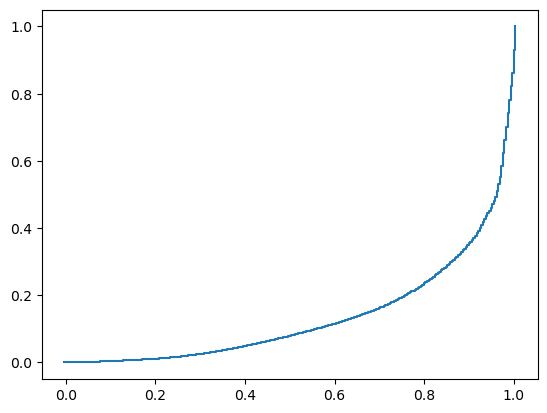

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('operations.csv')

expenses=data[data['amount']<0]

exp=-expenses['amount'].values
n=len(exp)

lorenz=np.cumsum(np.sort(exp))/exp.sum()
lorenz=np.append([0],lorenz)

#plt.axes().axis('equal')
xaxis=np.linspace(0-1/n,1+1/n,n+1)

plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

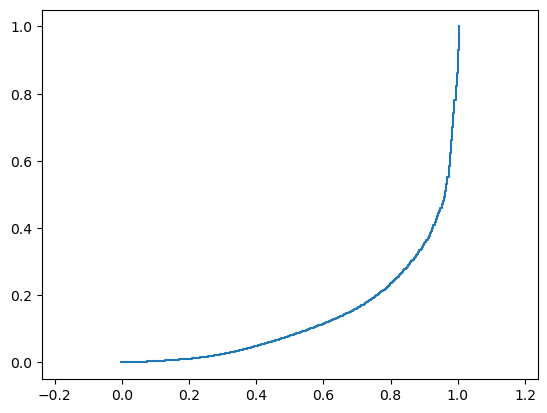

In [5]:
# Lets explain the above code step by step
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('operations.csv')

expenses=data[data['amount']<0] # here we filter the values in the amount column to include positive values only.
# the filtered data is then saved in a variable refered to as expenses.

exp=-expenses['amount'].values # we create a variable known as exp which is made up of negative filtered values.
n=len(exp) # this provides us with the number of the values in the exp variable. 

# np.cumsum gives us the comulative sum of a variable

# np.sort(exp) sorts the values in exp in ascending order, where high numbered values will be on top and low valued numbers at the botton
# np.sort(exp)/exp.sum divides each individual value of the exp colum, with the total sum of the exp column. 
# the above method allows us to obtain a ratio like value where its total sum will be 1. This is refered to as normalizing.
lorenz=np.cumsum(np.sort(exp))/exp.sum()
lorenz=np.append([0],lorenz) # this adds the value 0, so as to make sure the lorenz value starts at 0.
# remember that The Lorenz curve represents the cumulative distribution of a variable, typically income or wealth, 
# Lorenz Curve should start at the origin (0,0) to indicate that 0% of the population holds 0% of the wealth or income.
# the lorenz variable provides Y values.they contain the data points of the Y cordinates.

plt.axes().axis('equal')# this code is used to set the aspect ratio of the plot by making sure that the units are exual along both the x axis and the Y axis.
#this means that one unit along the x axis will have an exual length compared to the Y axis
xaxis=np.linspace(0-1/n,1+1/n,n+1) 
#the np.linspace() function creates an array of evenly distributed numbers over a specified interval. 
#for you to use it, you have to specify the start, the stop, and the interval.
#np.linspace(0-1/n,1+1/n,n+1) creates an array of equal intervales. they will start at 0-1/n,(-0.003436426116838488) and end at 1+1/n(1.0034364261168385).
# We have added 1 in the n+1 to cater to the np.array[0] that we added earlier. so now we have 292 values rather than 291.
# so , our x variables will start at 0-1/n, and end at 1+1/n . there will be a segment for each Y variable, and one for y=0.

plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [6]:
#Lets now focus on calculating the Gini index
AreaUunderCurve=(lorenz.sum()-lorenz[-1]/2-lorenz[0]/2)/n

s=0.5-AreaUunderCurve
gini=2*s
gini
# If our calculations were related to income, our gini coeficient would have suggested that there is a high income inequality among individuals. 

0.7204386813739185

In [7]:
# The gini coeficient or the gini index is a measure of statistical dispersion that is intended to represent the income or wealth distribution of a certain category. 
# in our case, it will be the bank clients
# it ranges from 1 to 0 where 0 represents perfect inequality, which shows that the value is perfectly distributed across the sample
# 1 denotes perfect inequality which means that a single individual has all the values . if it is income, it will mean that one person holds all the income and everyone else has none.
# to calculate the gini index, you will use the lorenz curve.
# in our example above, we have plotted the cummulative ratio of the total income recieved , against the number of recipients , starting from the poortest to the richest

# AreaUunderCurve=(lorenz.sum()-lorenz[-1]/2-lorenz[0]/2)/n
# lorenz.sum gets the value of all the values in the lorenz arrray. 
# lorenz[-1] is the last value in the lorenz array. 
# lorenz[-1]/2 devides this vallue by 2
# lorenz[0] is the first value in the lorenz array
# lorenz[0]/2 devides this value by 2
# lorenz.sum() provides a rough estimate of the total area under the lorenz curve.
# subtracting half of the first and the last value corrects the overestimation that occures from the sum.
# by subtracting half of the last value By subtracting half of this value, the formula accounts for the endpoint adjustment needed for the trapezoidal rule of integration.
# by subtracting half of the first value, one adjusts for the starting point in the trapizoidal integration method.
# dividing by n normalizes the sum to obtain the average value. 


# Understanding the Gini Coefficient
#  Range: The Gini coefficient ranges from 0 to 1.
#  0 represents perfect equality, where everyone has the same income or wealth.
#  1 represents perfect inequality, where one person has all the income or wealth and everyone else has none.

#                            Socioeconomic Implications
#  Economic Disparity: High inequality can lead to various socioeconomic issues, including reduced social cohesion, increased crime rates, and potential political instability.
# Access to Resources: In highly unequal societies, access to education, healthcare, and other essential services can be significantly skewed, favoring the wealthy.
# Economic Mobility: High inequality often correlates with low economic mobility, meaning that individuals have fewer opportunities to improve their economic status over time.
